In [1]:
#4ai) Adagrad GD OLS  

method MSE= [1.74940847e-03 4.94516250e-06 4.87088416e-06 4.86618274e-06
 4.86489132e-06 4.86212682e-06 4.86013101e-06 4.85786891e-06
 4.85595210e-06 4.85398139e-06]
β= [[-0.00105762]
 [ 0.17842942]
 [-0.06892822]
 [-0.08996991]
 [-0.05743917]
 [ 0.10802786]
 [-0.02954805]]


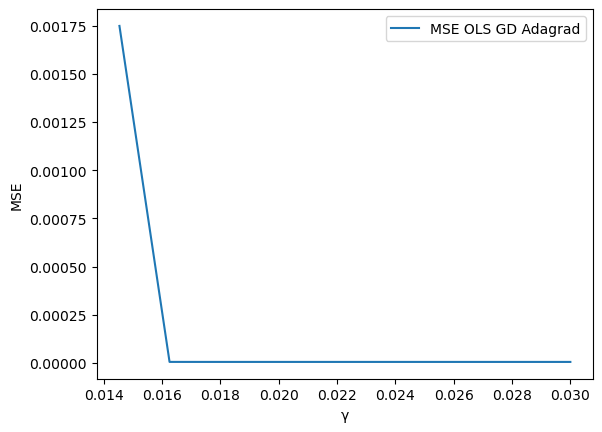

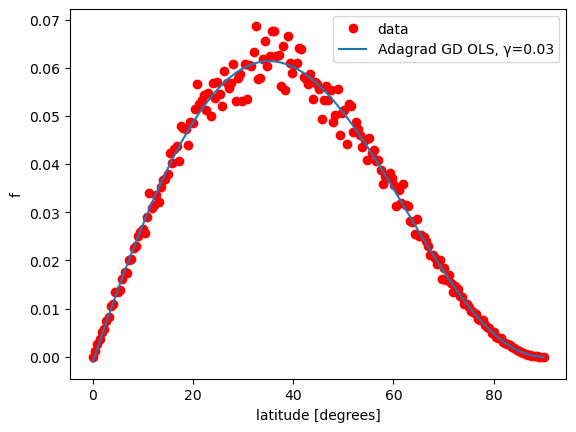

execution time= 2.956390380859375e-05 s


In [2]:
# Importing various packages
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import sys
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

#grid size
n = 200 

# Make data set.
x = np.linspace(0,(np.pi)/2,n).reshape(-1, 1)

#Northern H. parameters
s0 = 1
s2 = -0.473
a0 = 0.675
a2 = -0.192
i2 = -0.165

#flux function (eqn. (14) from Stone_1978)
y = 0.5*(s0*a2+s2*a0+(2/7)*s2*a2-i2)*((np.sin(x))**3-np.sin(x))

#noisy flux function
y_noisy = np.random.normal(y, abs(y*0.05)) 

def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

#polynomial fit
degree=6
poly = PolynomialFeatures(degree=degree)
X = poly.fit_transform(x)

# Hessian matrix
H = (2.0/n)* X.T @ X
invH = np.linalg.pinv(H)

# Get the eigenvalues
EigValues, EigVectors = np.linalg.eig(H)

beta_OLS = np.random.randn(degree+1,1)

Niterations = 1000000 

#We vary the leaning rate
ngammas = 10 

gammas = np.linspace(1.0/np.max(EigValues), 0.03, ngammas)

MSE_OLS_GD_ada = np.zeros(ngammas)   

for g in range(ngammas):
    gamma = gammas[g]

    # Including AdaGrad parameter to avoid possible division by zero
    delta  = 1e-8

    Giter = np.zeros(shape=(degree+1,degree+1))

    for iter in range(Niterations):
        gradient_OLS = (2.0/n)*X.T @ (X @ beta_OLS-y_noisy)

        Giter +=gradient_OLS @ gradient_OLS.T

        # Simpler algorithm with only diagonal elements
        Ginverse = np.c_[gamma/(delta+np.sqrt(np.diagonal(Giter)))]

        # compute update
        update = np.multiply(Ginverse,gradient_OLS)

        beta_OLS -= update

    ypredict_OLS_GD_ada=X @ beta_OLS

    MSE_OLS_GD_ada[g] = MSE(y_noisy, ypredict_OLS_GD_ada)

print('method MSE=', MSE_OLS_GD_ada)  
print('β=', beta_OLS)
    
plt.figure()
plt.plot(gammas, MSE_OLS_GD_ada, label='MSE OLS GD Adagrad')
plt.xlabel('γ')
plt.ylabel('MSE')
plt.legend()
plt.show()

plt.figure()
plt.plot(x*180/np.pi, y_noisy, 'ro', label='data')
plt.plot(x*180/np.pi, ypredict_OLS_GD_ada, label='Adagrad GD OLS, γ=0.03')
plt.xlabel('latitude [degrees]')
plt.ylabel('f')
plt.legend()
plt.show()

#Calculating the time processing time
import time
start_time = time.time()
print("execution time=", (time.time() - start_time), 's')

In [3]:
#4aii) Adagrad GD Ridge  

(array([0]), array([9]))
method MSE= 4.8533175163796395e-06


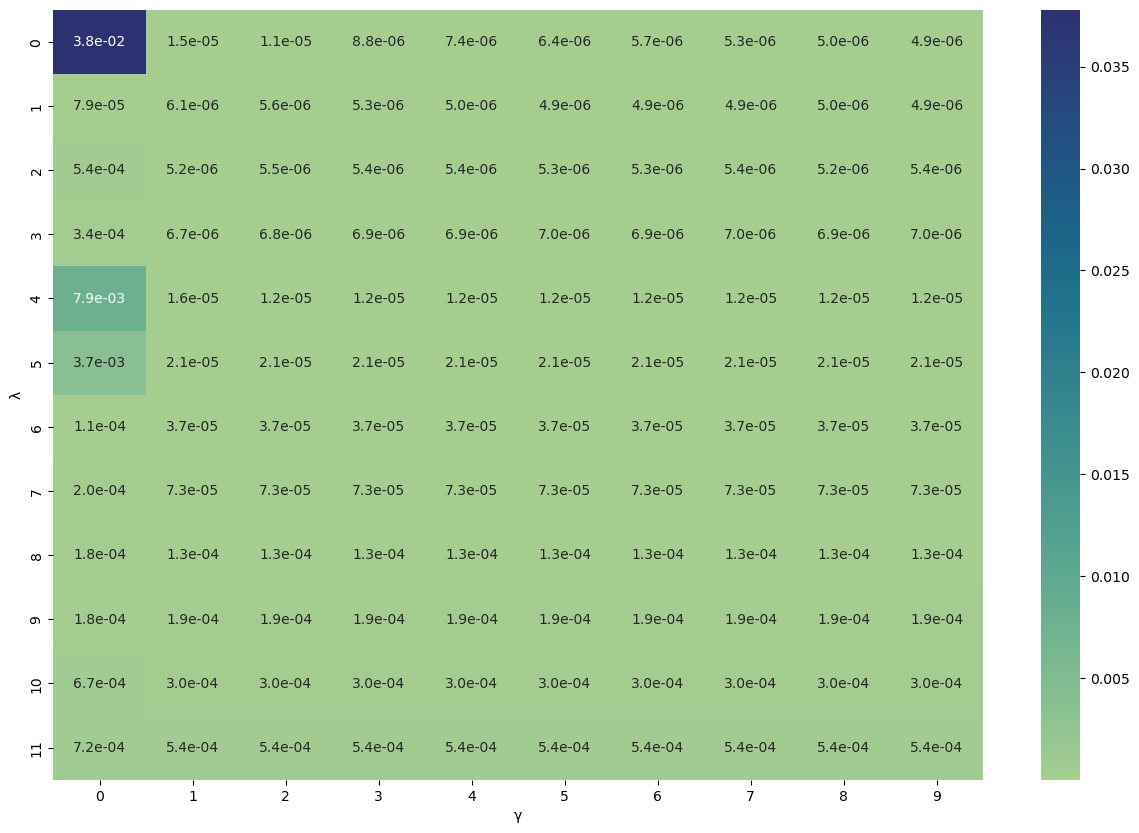

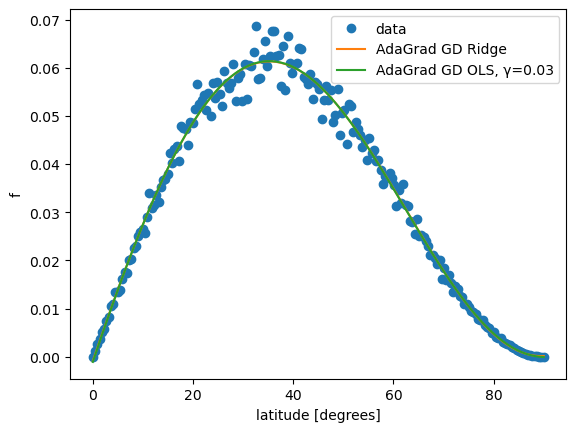

execution time= 3.528594970703125e-05 s


In [4]:
#Ridge parameter
nlambdas = 12 
lambdas = np.logspace(-5, 0, nlambdas) 

#leaning rate constants
Niterations = 100000  
ngammas = 10 
gammas = np.linspace(1.0/np.max(EigValues), 0.03, ngammas) 

y_Ridge_GD_ada_array= np.zeros((nlambdas, ngammas), dtype=object)
MSE_Ridge_GD_ada = np.zeros((nlambdas, ngammas))

#We vary the Ridge parameter
for l in range(nlambdas):
    lmbda = lambdas[l]
    beta_Ridge = np.random.randn(degree+1,1)    
    
    # We vary the learning rate
    for g in range(ngammas):
        gamma = gammas[g]
   
        # Including AdaGrad parameter to avoid possible division by zero
        delta  = 1e-8

        Giter = np.zeros(shape=(degree+1,degree+1))

        for iter in range(Niterations):
            gradient_Ridge = (2.0/n)*X.T @ (X @ (beta_Ridge)-y_noisy)+2*lmbda*beta_Ridge

            # Calculate the outer product of the gradients
            Giter +=gradient_Ridge @ gradient_Ridge.T

            # Simpler algorithm with only diagonal elements
            Ginverse = np.c_[gamma/(delta+np.sqrt(np.diagonal(Giter)))]

            # compute update
            update = np.multiply(Ginverse,gradient_Ridge)
            beta_Ridge -= update

        y_Ridge_GD_ada = X @ beta_Ridge
        
        y_Ridge_GD_ada_array[l, g] = y_Ridge_GD_ada

        MSE_Ridge_GD_ada[l, g]= MSE(y_noisy, y_Ridge_GD_ada) 

#finding the minimum value of the MSE
MSE_Ridge_GD_ada_optimal = np.min(MSE_Ridge_GD_ada)
conditon = (MSE_Ridge_GD_ada == MSE_Ridge_GD_ada_optimal)
#the l, g for which we have the minimum MSE
result = np.where(conditon)
print(result)

#saving the y that gives the optimal MSE
y_Ridge_GD_ada_optimal= y_Ridge_GD_ada_array[result]
y_Ridge_GD_ada_optimal=(y_Ridge_GD_ada_optimal[0])
#print(y_Ridge_GD_optimal)

print('method MSE=', MSE_Ridge_GD_ada_optimal)
            
import pandas as pd
import seaborn as sns

pd.DataFrame(MSE_Ridge_GD_ada)
mse_data_ridge = pd.DataFrame(MSE_Ridge_GD_ada)

plt.figure(figsize=(15,10))
sns.heatmap(data=mse_data_ridge, annot=True,  fmt=".1e", cmap="crest")
plt.xlabel("γ")
plt.ylabel("λ")
plt.show()

plt.figure()
plt.plot(x*180/np.pi, y_noisy, 'o', label='data')
plt.plot(x*180/np.pi, y_Ridge_GD_ada_optimal, label='AdaGrad GD Ridge')
plt.plot(x*180/np.pi, ypredict_OLS_GD_ada, label='AdaGrad GD OLS, γ=0.03')
plt.xlabel('latitude [degrees]')
plt.ylabel('f')
plt.legend()
plt.show()

#Calculating the time processing time
import time
start_time = time.time()
print("execution time=", (time.time() - start_time), 's')